<a href="https://colab.research.google.com/github/Hassan-Osama/AI-MileStone-1/blob/main/Copy_of_Assignment_2_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

!wget -O ex_image_1.jpg https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/cameraman.jpg # t = 50
!wget -O ex_image_2.jpg https://indiantechwarrior.com/wp-content/uploads/2021/10/Harris-Corner-600x570.jpg # t = 2
!wget -O test_image_1.jpg https://files.123freevectors.com/wp-content/original/171185-20-black-square-pattern-vector-pack-02.jpg # t = 103
!wget -O test_image_2.jpg https://docs.nvidia.com/vpi/kodim08_grayscale.png  # t = 75
!wget -O test_image_3.jpg https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcTGjNtoiUIHvLUMM5nLp_N4o3La-F8FKboqGnZ0X6faL7WpEjZK # t = 35
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WvA9cKxkkVe9JpzVljbq0pR73Vo_wy52' -O test_image_4.jpg # t = 65

ex_im1 = Image.open("ex_image_1.jpg").convert('L')
ex_im2 = Image.open("ex_image_2.jpg").convert('L')
test_im1 = Image.open("test_image_1.jpg").convert('L')
test_im2 = Image.open("test_image_2.jpg").convert('L')
test_im3 = Image.open("test_image_3.jpg").convert('L')
test_im4 = Image.open("test_image_4.jpg").convert('L')

ex_im1_arr = np.array(ex_im1,dtype="float64")
ex_im2_arr = np.array(ex_im2,dtype="float64")
test_im1_arr = np.array(test_im1,dtype="float64")
test_im2_arr = np.array(test_im2,dtype="float64")
test_im3_arr = np.array(test_im3,dtype="float64")
test_im4_arr = np.array(test_im4,dtype="float64")


--2023-12-07 08:20:50--  https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/cameraman.jpg
Resolving www.math.hkust.edu.hk (www.math.hkust.edu.hk)... 143.89.17.184
Connecting to www.math.hkust.edu.hk (www.math.hkust.edu.hk)|143.89.17.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12170 (12K) [image/jpeg]
Saving to: ‘ex_image_1.jpg’

ex_image_1.jpg      100%[===================>]  11.88K  --.-KB/s    in 0s      

2023-12-07 08:20:52 (48.9 MB/s) - ‘ex_image_1.jpg’ saved [12170/12170]

--2023-12-07 08:20:52--  https://indiantechwarrior.com/wp-content/uploads/2021/10/Harris-Corner-600x570.jpg
Resolving indiantechwarrior.com (indiantechwarrior.com)... 162.241.85.25
Connecting to indiantechwarrior.com (indiantechwarrior.com)|162.241.85.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15031 (15K) [image/jpeg]
Saving to: ‘ex_image_2.jpg’

ex_image_2.jpg      100%[===================>]  14.68K  --.-KB/s    in 0.02s

# **Harris:**


*   **Input:**
  1. **The input image** (2D array or the original image)
  2. **Tunable parameter k** (for simplicity equate it to 0.04 for testing purposes).
*   **Output:**
  1. **2D array** representing the matrix (the resulting image) after corner detection.
  2. **Min** which represents the min value of the resulted values after applying harris on the input image
  3. **Max** which represents the max value of the resulted values after applying harris on the input image
*   **Description:**
  * Implements the Harris corner detection technique as discussed in the tutorial using **a 3 x 3 window** around each pixel and use the given kernels in the assignment description to compute the derivative in the **x** and **y** directions.

In [ ]:
def xAxis(arr):
  res = np.zeros((3,3))
  rows,colls = res.shape
  for i in range(0,3):
    for j in range(0,3):
      res[i][j] = -arr[i+1][j]+arr[i+1][j+2]
  return res

def yAxis(arr):
  res = np.zeros((3,3))
  for i in range(0,3):
    for j in range(0,3):
      res[i][j] = -arr[i][j+1] + arr[i+2][j+1]
  return res


def helpH(arr, k=0.04):
  Ix = xAxis(arr)
  Iy = yAxis(arr)
  Ixx = multiply(Ix,Ix)
  Iyy = multiply(Iy,Iy)
  Ixy = multiply(Ix,Iy)

  det_M = Ixx * Iyy - Ixy * Ixy
  trace_M = Ixx + Iyy
  res = det_M - k * (trace_M**2)
  return res

def multiply(Ix, Iy):
  sum=0
  for i in range(0,3):
    for j in range(0,3):
      sum += Ix[i][j]*Iy[i][j]
  return sum

def Harris(image, k=0.04):

  res = np.zeros_like(image, dtype = np.float64)
  rows, cols = image.shape
  for i in range(2,rows-2):
    for j in range(2, cols-2):
      tmp = array_2d = np.zeros((5, 5))
      y=0
      for k in range(i-2, i+3):
        x=0
        for z in range(j-2, j+3):
          tmp[y][x] = image[k][z]
          x+=1
        y+=1
        x=0

      res[i][j] = helpH(tmp, 0.04)


  return res, np.min(res), np.max(res)



# **Susan:**


*   **Input:**
  1. **The Original Image** (It is advisable to not turn the image to 2D array to give more accurate results)

  2. **Tunable Parameter t**.

*   **Output:**
  1. **2D array** representing the resulting image.
  
*   **Description:**
  * Implement the Susan corner detection using the equation discussed in the tutorial and a kernel size which is equal to **3x3**.

In [ ]:


def calc(a1, a, t):
  e = 2.718281828459045
  exp = ((a-a1)/t)**6
  return (np.exp(-exp))


def Susan(image, t):
  res = np.zeros_like(image, dtype = np.float64)
  rows, cols = image.shape
  for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        res[i , j ] = calc(image[i-1][j-1],image[i][j],t)+calc(image[i-1][j],image[i][j],t)+calc(image[i-1][j+1],image[i][j],t)+calc(image[i][j-1],image[i][j],t)+calc(image[i][j],image[i][j],t)+calc(image[i][j+1],image[i][j],t)+calc(image[i+1][j-1],image[i][j],t)+calc(image[i+1][j],image[i][j],t)+calc(image[i+1][j+1],image[i][j],t)
  return res



# **Getting Data Ready for Convex Hull**
In order to get the data ready for the convex hull, we need to get the histogram of the resulting
images. Susan is fine to get a histogram while Harris is not !!. Why is this? Because the
resulted values vary from the negative to positive values. Hence, we get the max and min value
resulted in Harris. So we need to handle it first by performing contrast stretching on the image
before getting the histogram so that the values are mapped between [0-255].

## **Contrast Stretching:**

*   **Input:**
  1. **2D array representing the image** (the output of harris)

  2. **a,b,c,d** (the variables required for contrast stretching).

*   **Output:**
  1. **2D array representing the output after applying contrast stretching.**
  

In [ ]:
def contrastStretch(im, a,b,c,d):
  res = im.copy()
  scl = (b-a)/(d-c)
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      res[i][j] = int((int(im[i][j])-c)*scl+a)
  return res

## **Calculate Histogram for Susan:**


*   **Input:**
  1. **2D array representing the image** (resulted from susan)

*   **Output:**
  1. **an array representing the histogram of the image**
  

In [ ]:
def CalcHistSusan(image):
  res = [0 for x in range((3**2)+1)]
  for i in range(len(image)):
    for j in range(len(image[0])):
      res[int(image[i][j])]+=1
  return res

## **Calculate Histogram for Harris:**


*   **Input:**
  1. **2D array representing the image** (resulted from harris after doing the *necessary modification*)

*   **Output:**
  1. **an array representing the histogram of the image**
  

In [ ]:
def CalcHistHarris(image):
  res = [0 for x in range(256)]
  for i in range(len(image)):
    for j in range(len(image[0])):
      res[int(image[i][j])]+=1
  return res

# **Convex Hull:**
As gradient magnitudes are calculated out of edges and corners
detectors, a threshold is traditionally used in order to allow only strong
features to be returned as a result. Instead of assigning static
thresholds, an automated approach is to be followed, which is the convex hull. Hence, in this part you are asked to implement the
following functions:

## **GetHull:**

*   **Input:**
  1. **1D array** representing the histogram.

*   **Output:**
  1. **1D array of tuples** representing the start point *(x,y)* and the end point *(x,y)* of each region in the convex hull.
  
*   **Description:**
  * As discussed in the tutorial, we start the convex hull by getting the
maximum slope that will represent each region and hence we want to
know the start point of the region *(x,y)* and the end point of it *(x,y)*.

In [ ]:
def help(i, hist):
  maxS = -1000000000000
  maxI = 0
  for j in range(i+1,len(hist)):
    x1, y1, x2, y2 = i, hist[i], j, hist[j]
    slope = (y2*1.0-y1*1.0)/(x2*1.0-x1*1.0)
    if slope > maxS:
      maxS = slope
      maxI = j
  return (maxI, hist[maxI])

def getHull(hist):
  hull_points = [(0,hist[0])]
  hull_points = hull_points+[help(0,hist)]
  i = hull_points[len(hull_points)-1][0]
  while(i < len(hist)-1):
    hull_points = hull_points+[help(i,hist)]
    i = hull_points[len(hull_points)-1][0]


  return hull_points

## **GetHullValues:**

*   **Input:**
  1. **1D array of tuples** representing the convex hull points.

*   **Output:**
  1. **1D array** representing the hull values for each color.
  
*   **Description:**
  * Here we get the hull values according to the equation of region which you
can get using the equation of the straight line: *y=mx+c*.
  * Get the *hull value* of each intensity by substituting in the line equation to get the *y* value (*representing the hull value*)

In [ ]:
def getHullValues(hull):
  res = []
  res = res + [hull[0][1]]
  for i in range(len(hull)-1):
    start, end = hull[i],hull[i+1]
    x1,y1 = start
    x2,y2 = end
    m = (y2-y1)/(x2-x1)
    c = y1 - m * x1
    for j in range(x1+1, x2+1):
      res = res + [(m * j) + c]

  return res

## **GetThreshold:**

*   **Input:**
  1. **1D array** representing the histogram.
  2. **1D array** representing the hull values.

*   **Output:**
  1. **The threshold** according to the convex hull criteria.
  
*   **Description:**
  * Here you take the hull values and the histogram values and apply the last
step in convex hull algorithm to get the threshold

In [ ]:
def getThreshold(hist, hullV):
  res = 0
  maxI = 0
  for i in range(len(hullV)):
    if hist[i] != 0:
      if(res < abs(hist[i]-hullV[i])):
        res = abs(hist[i]-hullV[i])
        maxI = i
  return maxI

## **ApplyThresh:**

*   **Input:**
  1. **1D array** representing the histogram.
  2. **The Threshold** value.

*   **Output:**
  1. **2 1D arrays**  representing the histogram after splitting it below and above the threshold
  
*   **Description:**
  * The main aim of this function is to split the histogram into two arrays
representing the histogram of values below threshold and histogram of
values above threshold so that we can re-apply the thresholding once
again on the resulted histograms

In [ ]:
def applyThres(hist, thres):

    below = hist[:thres + 1]
    above = hist[thres + 1:]

    return below, above


# Getting the Resulted Images:

## **drawImages:**

*   **Input:**
  1. **First Threshold** representing the lower threshold.
  2. **Second Threshold** representing the higher threshold.
  3. **Image** the image resulted from the corner detectors

*   **Output:**
  1. **3 images**  representing the original image after splitting it into three regions which are:
      * **lower region** which is the image below the threshold.
      * **mid region** which is the image between the 2 thresholds.
      * **higher region** which is the image above the higher threshold.
  
*   **Description:**
  * The main purpose of this image is to split the image into 3 images after getting all the work done and getting 2 thresholds from the resulted image of the corner detection so that we can divide the image into corners, detectors and flat regions.

In [ ]:
def drawImages(thresh1,thresh2,image):
  res1 = [[0 for x in range(len(image[0]))] for y in range(len(image))]
  res2 = [[0 for x in range(len(image[0]))] for y in range(len(image))]
  res3 = [[0 for x in range(len(image[0]))] for y in range(len(image))]
  for i in range(1,len(image)-1):
    for j in range(1,len(image[0])-1):
      if(image[i][j]<thresh1):
        res1[i][j] = image[i][j]

        res1[i-1][j-1] = 255
        res1[i-1][j] = 255
        res1[i-1][j-1] = 255
        res1[i][j-1] = 255
        res1[i][j+1] = 255
        res1[i+1][j-1] = 255
        res1[i+1][j] = 255
        res1[i+1][j+1] = 255
      elif image[i][j] >= thresh1 and image[i][j] <thresh2:
        res2[i][j] = image[i][j]
      elif image[i][j] >=thresh2:
        res3[i][j] = image[i][j]
  return res1,res2,res3

# Testing Scenarios:

## Example Images

### First Example Image:


*   **t = 50**



In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(ex_im1_arr, 50)
histResS = CalcHistSusan(resS)
print(histResS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)

con, min, max = Harris(ex_im1_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH, getHullValues(getHull(histH)))
lower, higher = applyThres(histH,first_ThresH)
second_ThresH = getThreshold(lower, getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(first_ThresH, second_ThresH, con)


[1020, 107, 324, 641, 890, 2261, 1881, 2356, 54633, 1423]


Susan's Thresholds:  7 2


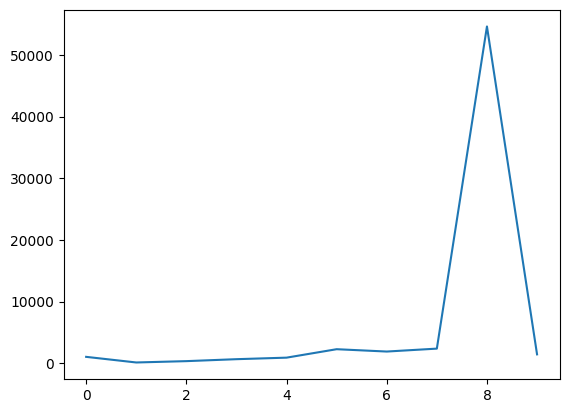

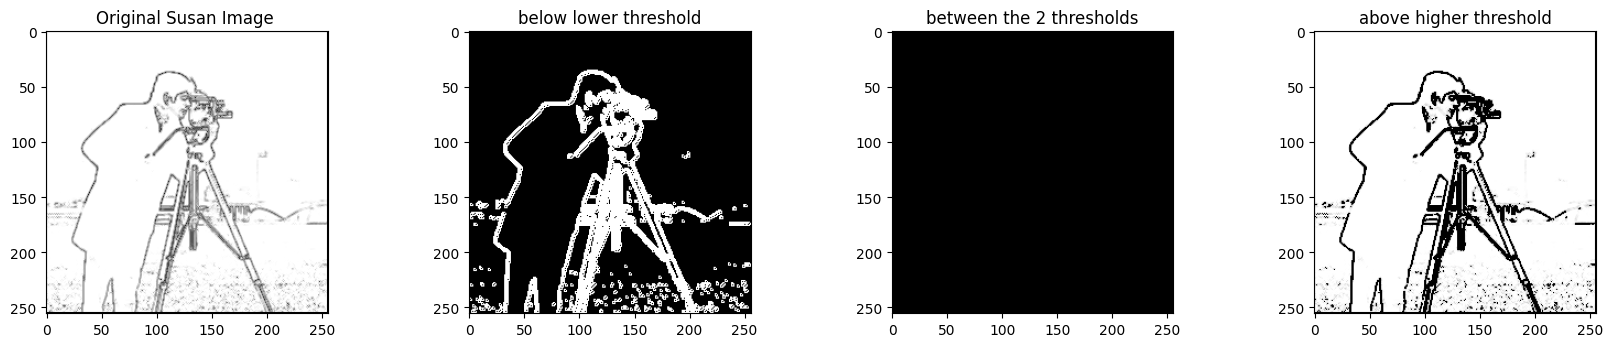

Harris's Thresholds:  53 50
Min =  -5229678515.64 Max =  20665575919.84


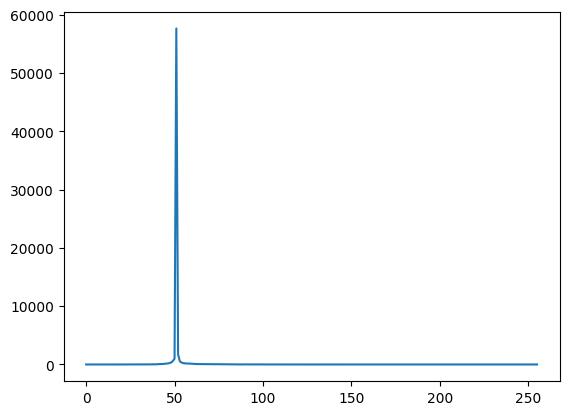

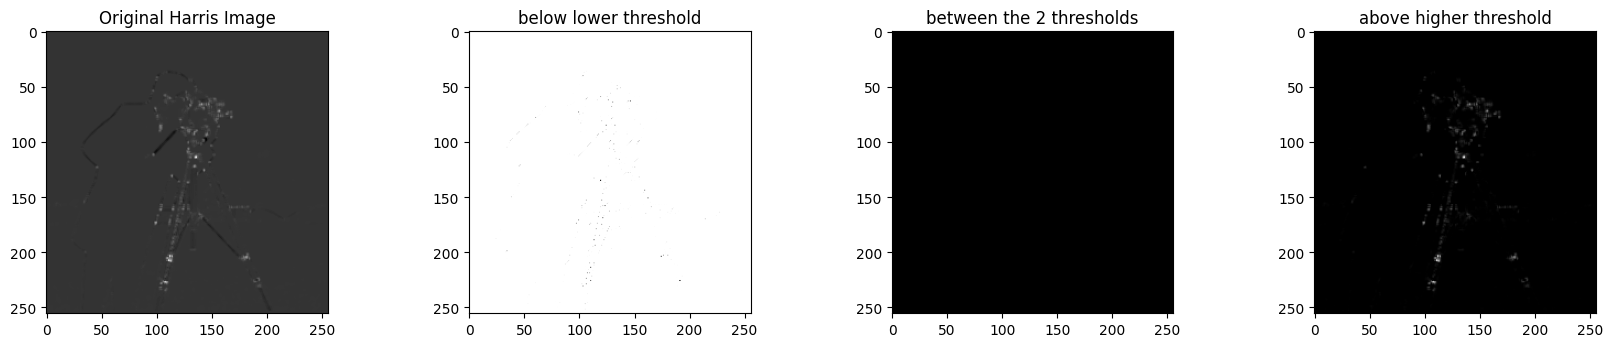

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)


### Second Example Image:

* **t = 2**

In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(ex_im2_arr, 2)
histResS = CalcHistSusan(resS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)


con, min, max = Harris(ex_im2_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH, getHullValues(getHull(histH)))
lower, higher = applyThres(histH,first_ThresH)
second_ThresH = getThreshold(lower, getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(40, 38, con)


Susan's Thresholds:  8 7


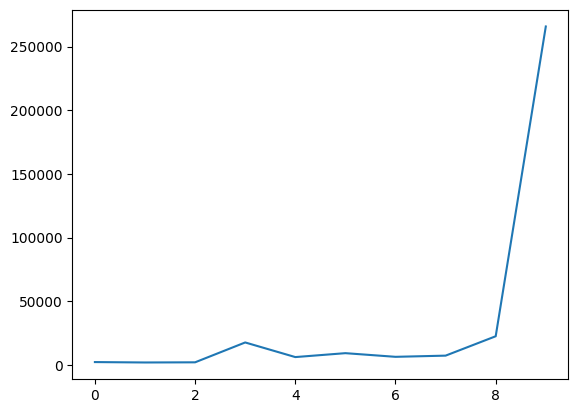

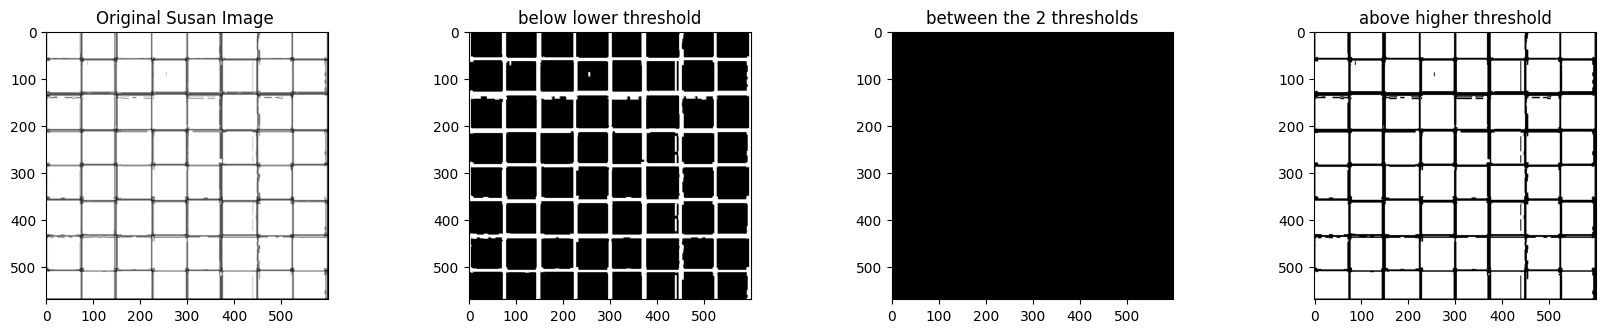

Harris's Thresholds:  40 38
Min =  -4690140437.16 Max =  25894828323.04


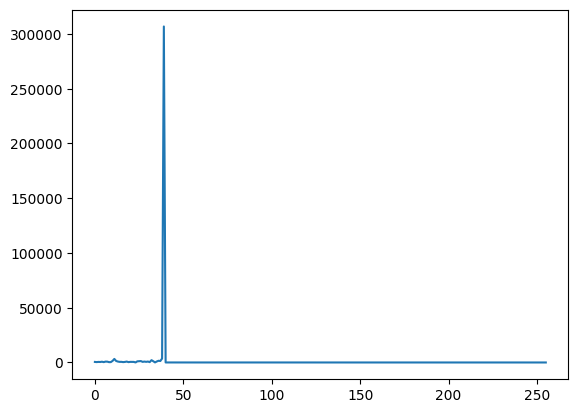

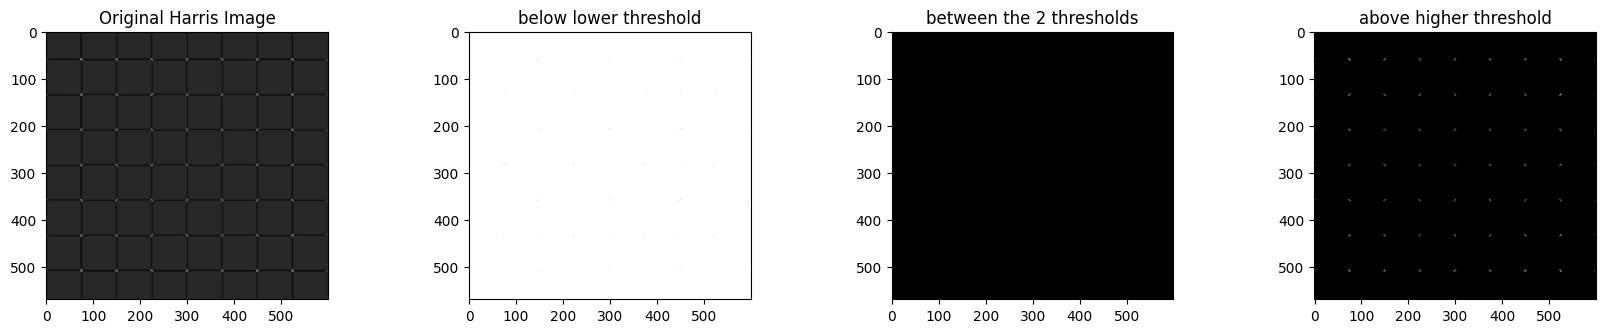

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)


## **Test Images**

### First Test Image:


*   **t = 102**



In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(test_im1_arr, 102)
histResS = CalcHistSusan(resS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)


con, min, max = Harris(test_im1_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH,getHullValues(getHull(histH)))
lower,higher = applyThres(histH, first_ThresH)
second_ThresH = getThreshold(lower,getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(first_ThresH, second_ThresH, con)



Susan's Thresholds:  7 4


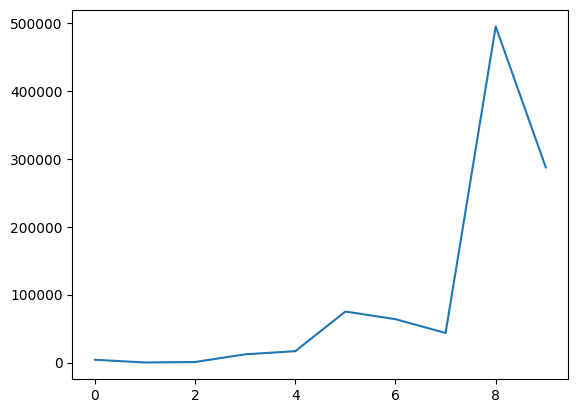

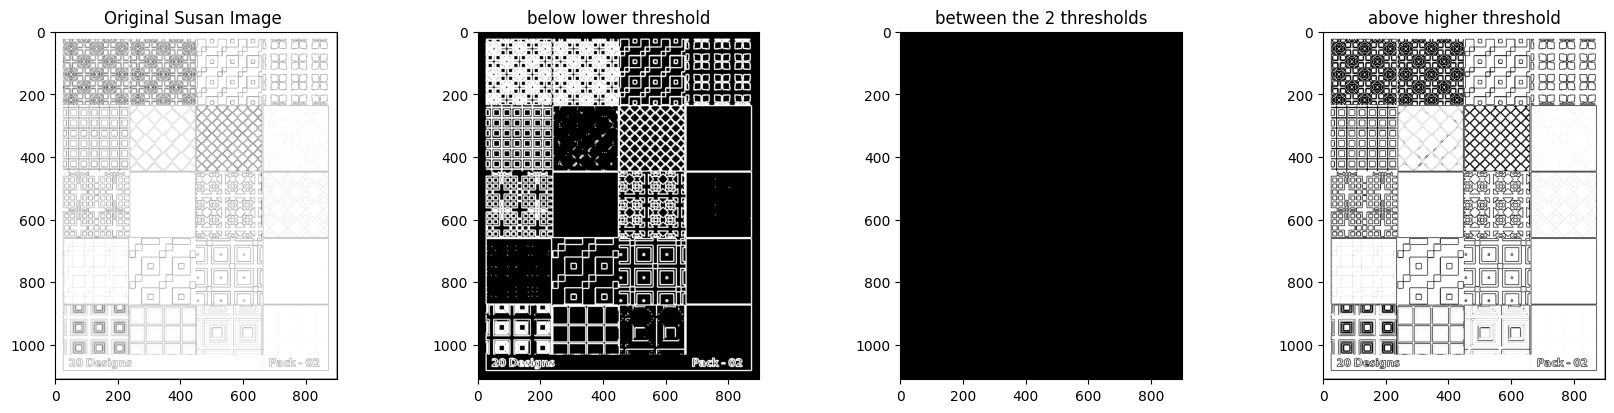

Harris's Thresholds:  51 47
Min =  -15684378928.04 Max =  65522028473.24


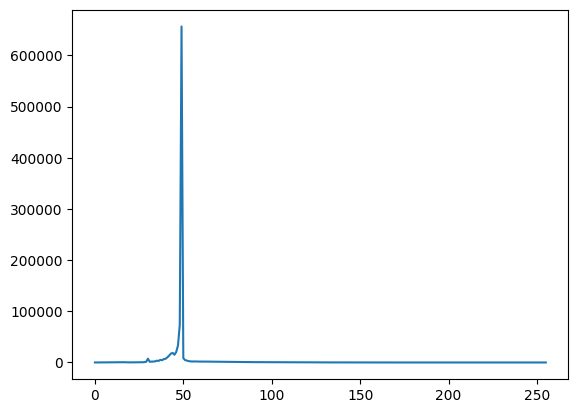

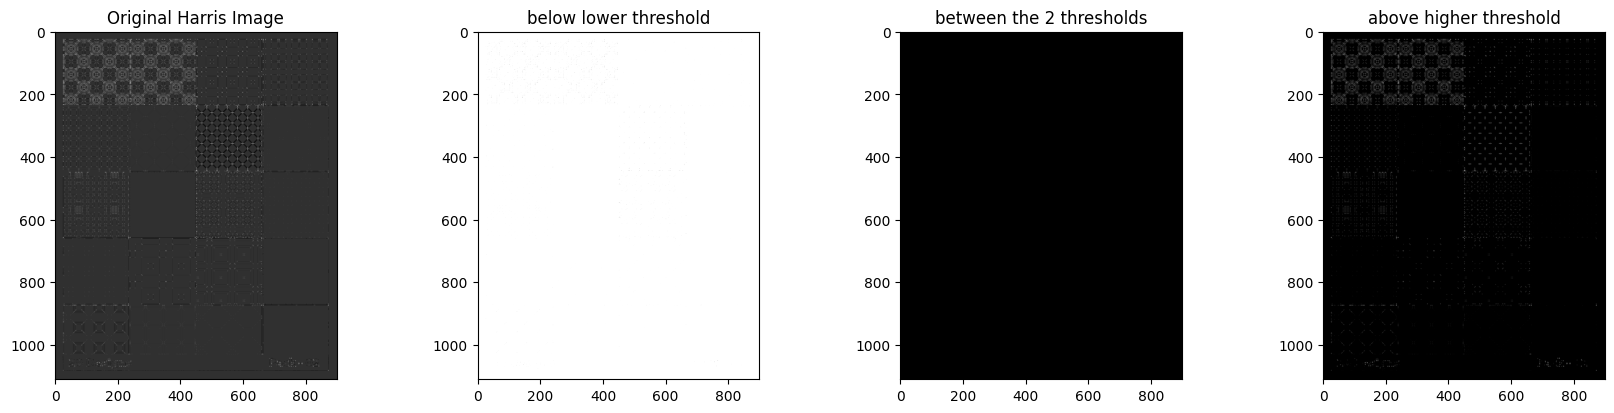

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)

### Second Test Image:


*   **t = 75**



In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(test_im2_arr, 75)
histResS = CalcHistSusan(resS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)


con, min, max = Harris(test_im2_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH,getHullValues(getHull(histH)))
lower,higher = applyThres(histH, first_ThresH)
second_ThresH = getThreshold(lower,getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(first_ThresH, second_ThresH, con)



Susan's Thresholds:  7 4


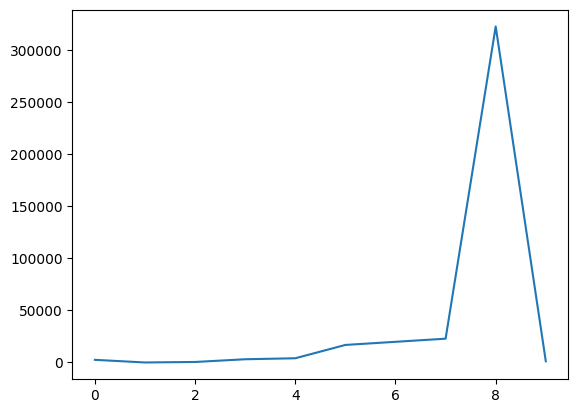

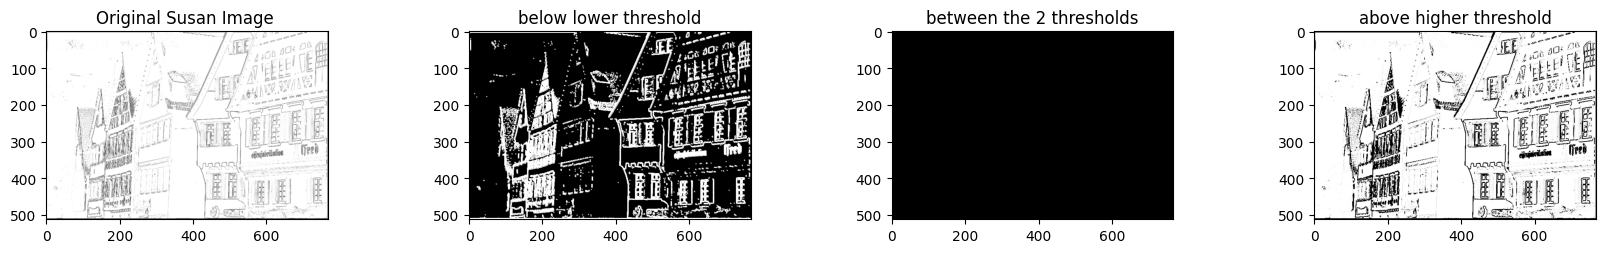

Harris's Thresholds:  49 44
Min =  -5847336762.04 Max =  26665164142.36


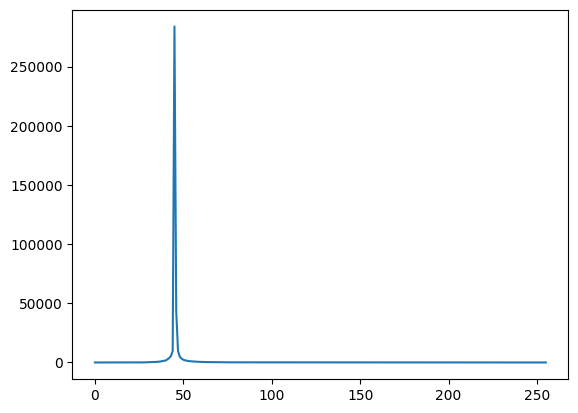

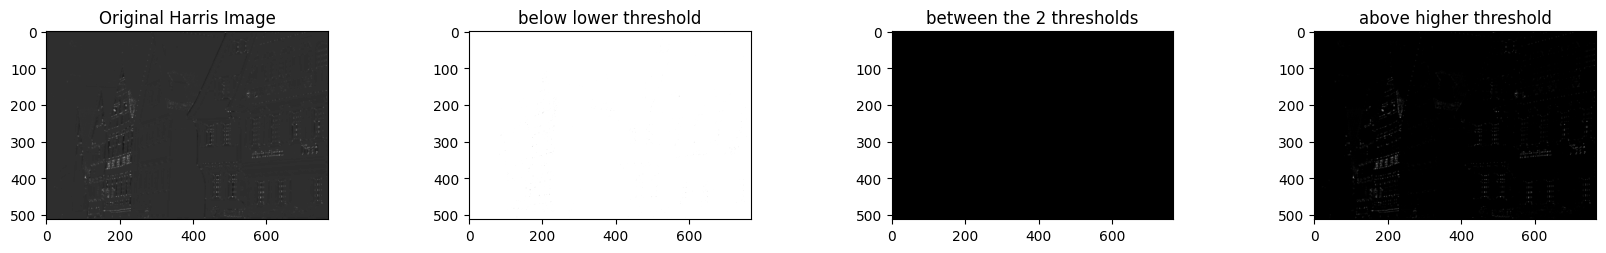

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)

### Third Test Image:


*   **t = 35**



In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(test_im3_arr, 35)
histResS = CalcHistSusan(resS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)


con, min, max = Harris(test_im3_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH,getHullValues(getHull(histH)))
lower,higher = applyThres(histH, first_ThresH)
second_ThresH = getThreshold(lower,getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(first_ThresH, second_ThresH, con)



Susan's Thresholds:  7 4


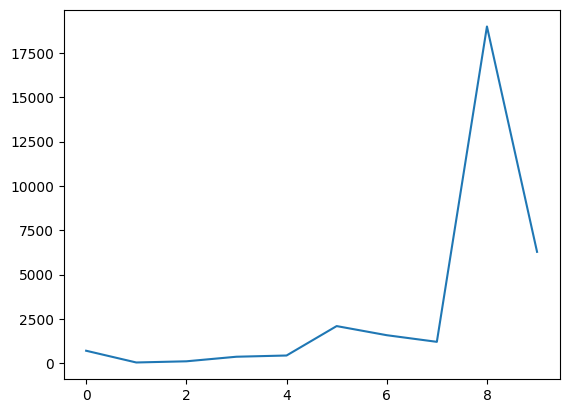

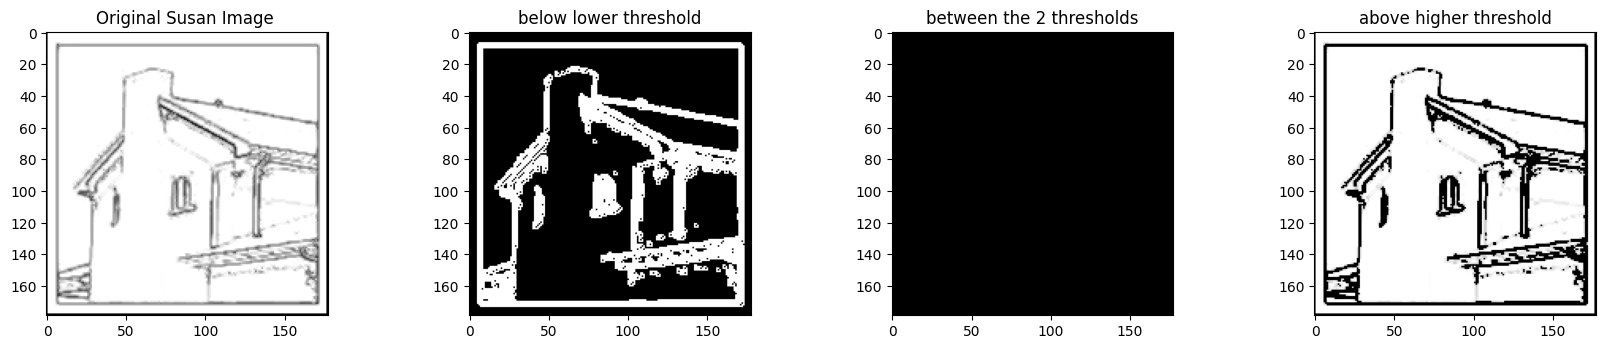

Harris's Thresholds:  56 52
Min =  -3299254468.0 Max =  12230169601.0


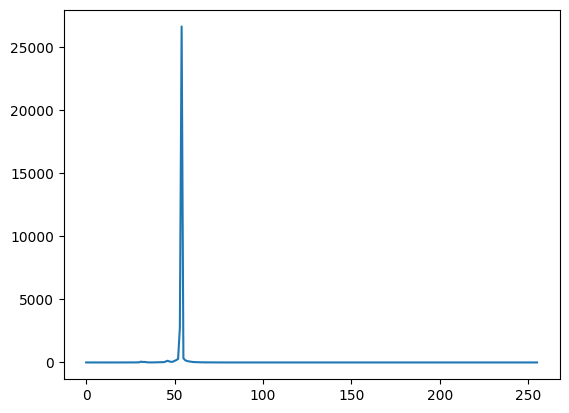

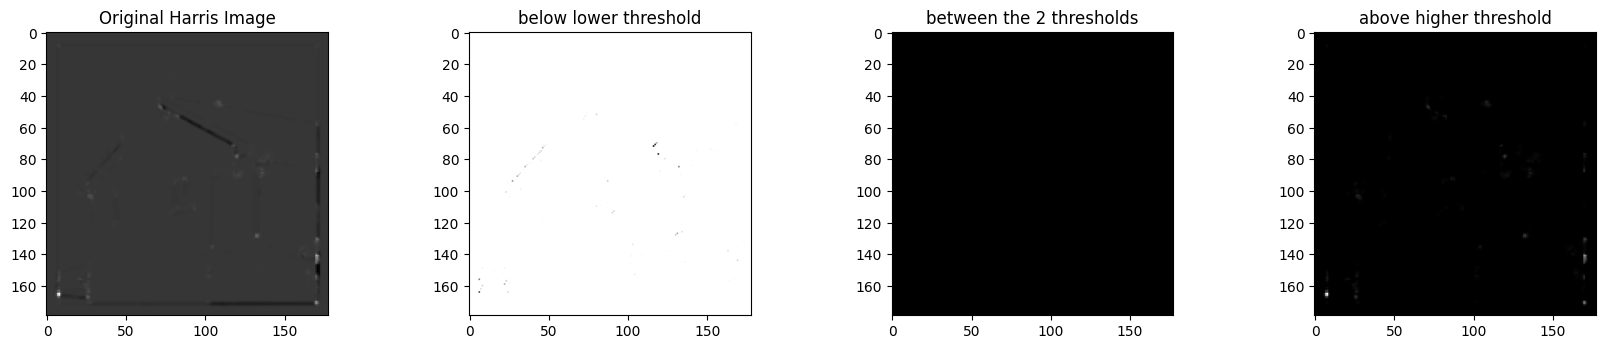

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)

### Forth Test Image:


*   **t = 65**



In [ ]:
# Call your Functions Below and keep the same format for showing the output:
# Save your resulted images in variables im1, im2, and im3 so that you don't change the parameters
resS = Susan(test_im4_arr, 65)
histResS = CalcHistSusan(resS)
first_Thres = getThreshold(histResS,getHullValues(getHull(histResS)))
lower,higher = applyThres(histResS, first_Thres)
second_Thres = getThreshold(lower,getHullValues(getHull(lower)))
im1_S, im2_S, im3_S = drawImages(first_Thres, second_Thres, resS)


con, min, max = Harris(test_im4_arr)
stretched = contrastStretch(con, 0, 255, min, max)
histH = CalcHistHarris(stretched)
first_ThresH = getThreshold(histH,getHullValues(getHull(histH)))
lower,higher = applyThres(histH, first_ThresH)
second_ThresH = getThreshold(lower,getHullValues(getHull(lower)))
im1, im2, im3 = drawImages(first_ThresH, second_ThresH, con)



Susan's Thresholds:  7 4


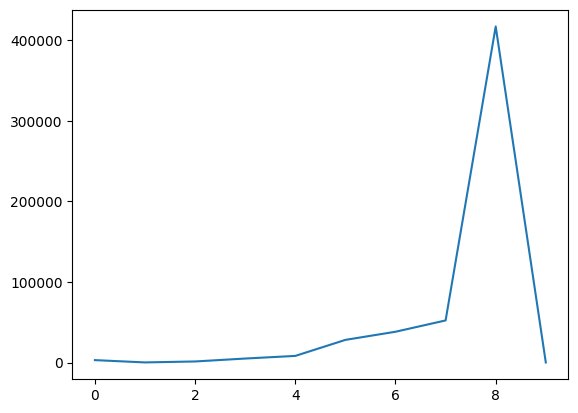

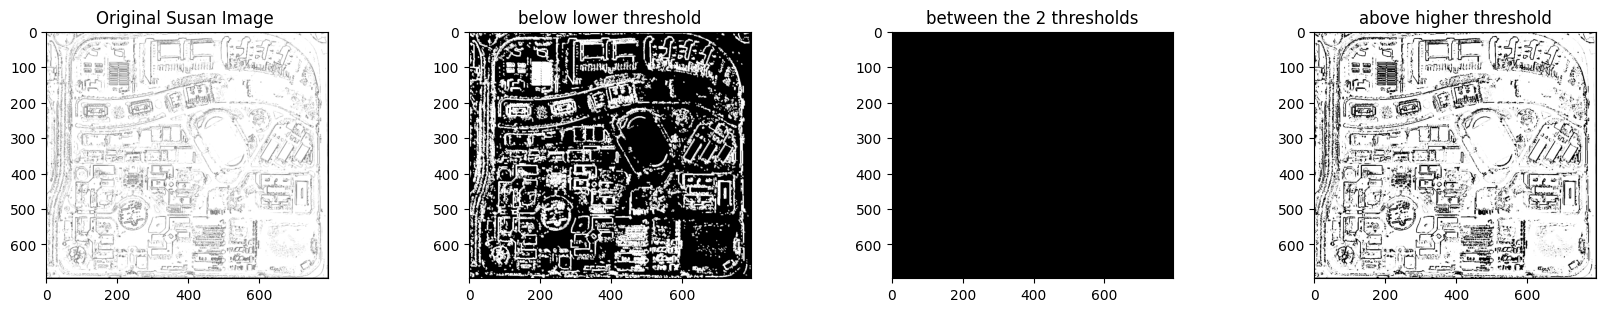

Harris's Thresholds:  50 43
Min =  -4936234901.0 Max =  22955748596.44


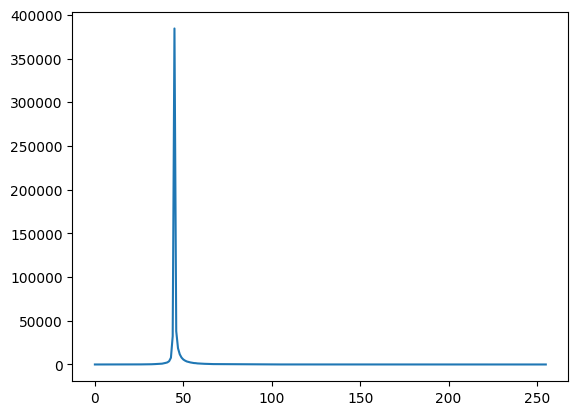

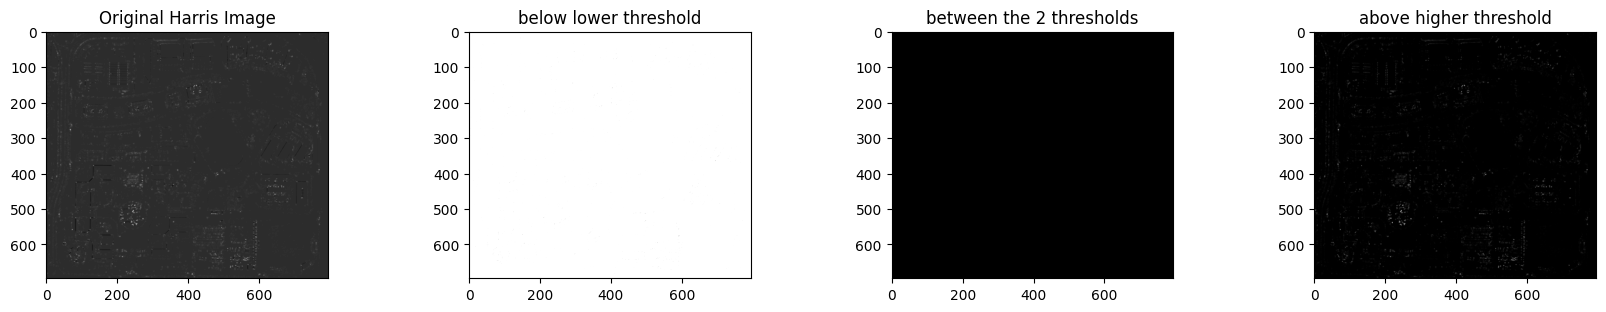

In [ ]:

print("Susan's Thresholds: ",first_Thres,second_Thres)
plt.plot(histResS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(resS, cmap='gray')
s = 'Original Susan Image '
plt.title(s)

plt.subplot(1, 4, 2)
plt.imshow(im1_S, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2_S, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3_S, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)
plt.show()

# ================================================================================================

print("Harris's Thresholds: ",first_ThresH,second_ThresH)
print("Min = ",min,"Max = ",max)
plt.plot(histH)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(con, cmap='gray')
plt.title('Original Harris Image')

plt.subplot(1, 4, 2)
plt.imshow(im1, cmap='gray')
plt.title('below lower threshold')
plt.subplot(1, 4, 3)
plt.imshow(im2, cmap='gray')
plt.title('between the 2 thresholds')

plt.subplot(1, 4, 4)
plt.imshow(im3, cmap='gray')
plt.title('above higher threshold')

plt.subplots_adjust(wspace=0.5)